In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

# Load the data

In [2]:
data=pd.read_csv('C:/Data Science/technocolabs/Mini Project/Attrition-Forecast-Analysis-and-Prediction/Acme_Attrition Data/WA_Fn-UseC_-HR-Employee-Attrition.csv',header=0)

# for displaying few row

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# check for missing value

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# generate summary statics

In [6]:
summary_statistics = data.describe(include='all')

In [7]:
summary_statistics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


# data visualization

# Attrition Count Pie Chart

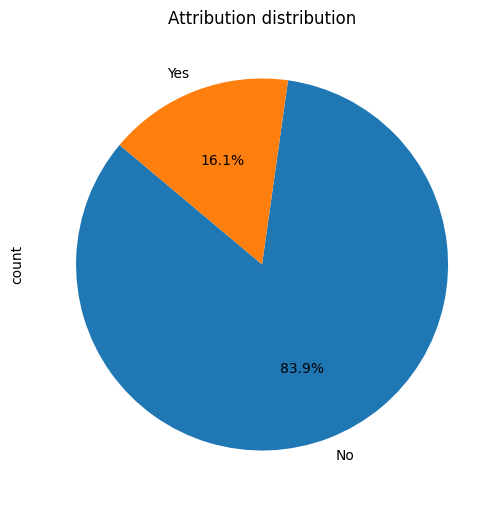

In [8]:
plt.figure(figsize=(6,9))
data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',startangle=140)
plt.title('Attribution distribution')
plt.show()

# buissness Travel distribution

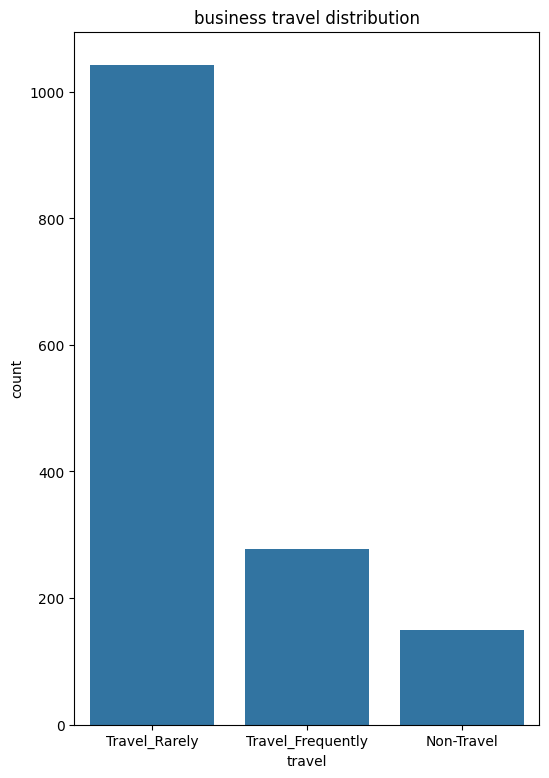

In [9]:
plt.figure(figsize=(6,9))
sns.countplot(data=data,x='BusinessTravel')
plt.title('business travel distribution')
plt.xlabel('travel')
plt.ylabel('count')
plt.show()

# Monthly Income Box Plot

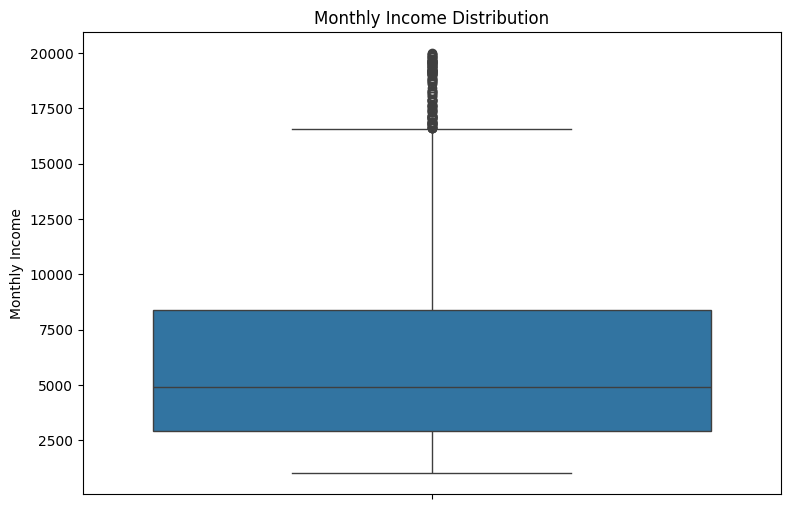

In [10]:
plt.figure(figsize=(9,6))
sns.boxplot(data=data, y='MonthlyIncome')
plt.title('Monthly Income Distribution')
plt.ylabel('Monthly Income')
plt.show()

# Job Role Count Bar Chart

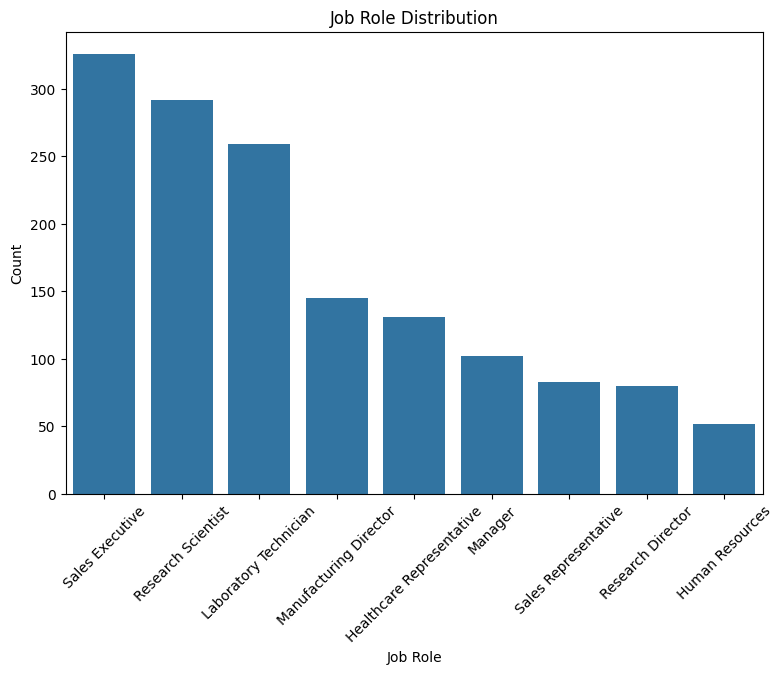

In [11]:
plt.figure(figsize=(9,6))
sns.countplot(data=data, x='JobRole')
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Department Distribution Pie Chart

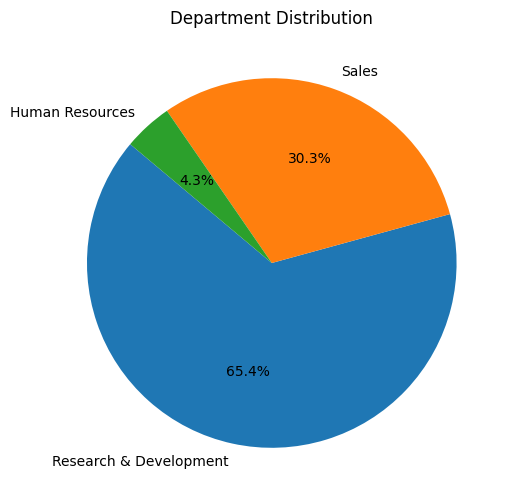

In [12]:
plt.figure(figsize=(9,6))
data['Department'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Department Distribution')
plt.ylabel('')
plt.show()

# Education Level Histogram

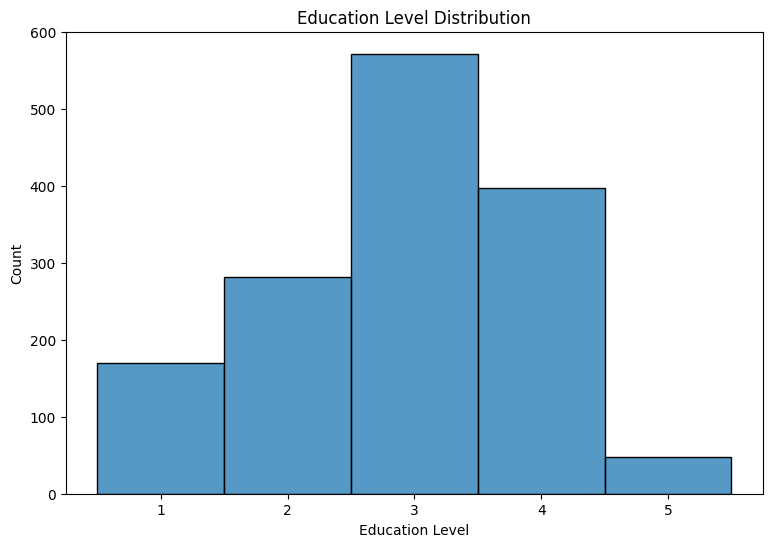

In [13]:
plt.figure(figsize=(9,6))
sns.histplot(data['Education'], bins=range(1, 5), discrete=True)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Distance from Home vs. Attrition Scatter Plot

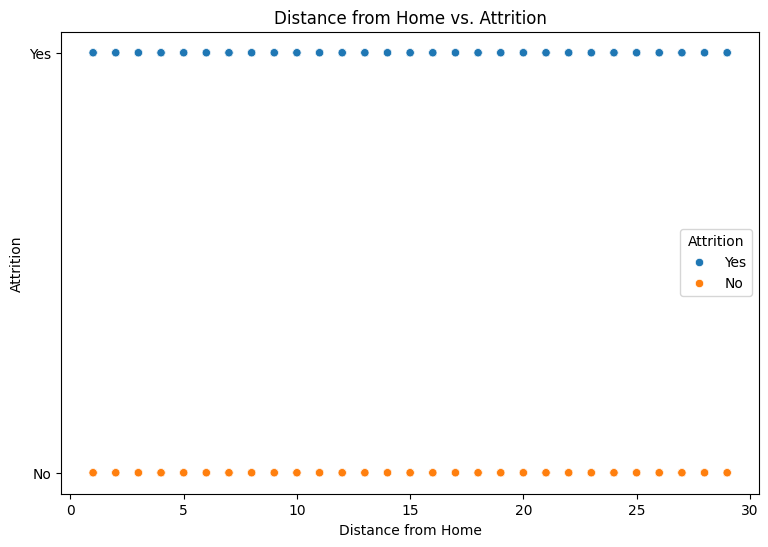

In [14]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=data, x='DistanceFromHome', y='Attrition', hue='Attrition')
plt.title('Distance from Home vs. Attrition')
plt.xlabel('Distance from Home')
plt.ylabel('Attrition')
plt.show()

# Monthly Income vs. Attrition Scatter Plot

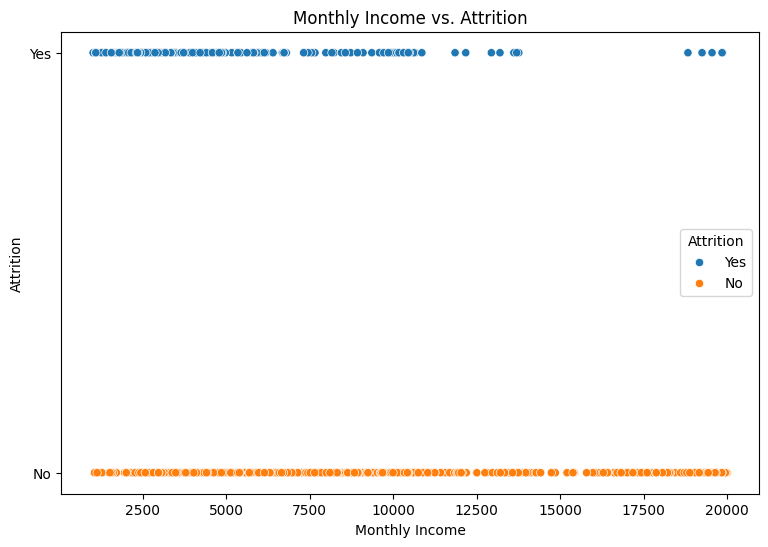

In [15]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=data, x='MonthlyIncome', y='Attrition', hue='Attrition')
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Attrition')
plt.show()

# Job Satisfaction vs. Business Travel Bar Chart

C:\Users\shubh\AppData\Local\Temp\ipykernel_19056\3301134670.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='BusinessTravel', y='JobSatisfaction', ci=None)


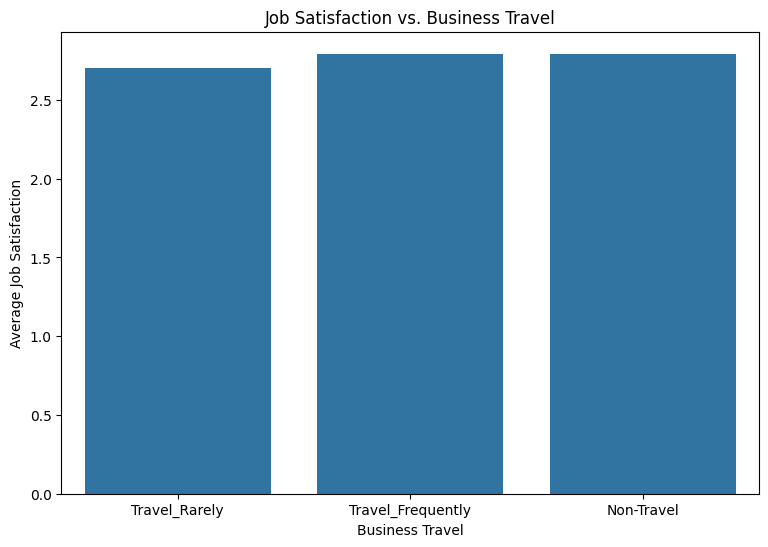

In [16]:
plt.figure(figsize=(9,6))
sns.barplot(data=data, x='BusinessTravel', y='JobSatisfaction', ci=None)
plt.title('Job Satisfaction vs. Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Average Job Satisfaction')
plt.show()

#  Encode Categorical Variables

In [17]:
data_encoded = pd.get_dummies(data, columns=[
    'Attrition','BusinessTravel', 'JobRole', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime', 'Over18'])
pd.DataFrame(data_encoded)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Over18_Y
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,True
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,False,True
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True


# Create Interaction Features

In [18]:
data_encoded['DistanceBusinessTravel'] = data['DistanceFromHome'] * data_encoded['BusinessTravel_Travel_Frequently']

In [19]:
pd.DataFrame(data_encoded['DistanceBusinessTravel'])

,DistanceBusinessTravel
0,0
1,8
2,0
3,3
4,0
...,...
1465,23
1466,0
1467,0
1468,2


# Create Binned Features

In [20]:
bins = [0, 3000, 5000, 7000, 9000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']
data_encoded['IncomeCategory'] = pd.cut(data['MonthlyIncome'], bins=bins, labels=labels)
data_encoded = pd.get_dummies(data_encoded, columns=['IncomeCategory'])
pd.DataFrame(data_encoded)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Over18_Y,DistanceBusinessTravel,IncomeCategory_Low,IncomeCategory_Medium,IncomeCategory_High,IncomeCategory_Very High,IncomeCategory_Extremely High
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,True,0,False,False,True,False,False
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,False,True,8,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,True,0,True,False,False,False,False
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,3,True,False,False,False,False
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,23,True,False,False,False,False
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,0,False,False,False,False,True
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,0,False,False,True,False,False
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,F

# Normalize Numerical Features

In [21]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['DistanceFromHome', 'MonthlyIncome']
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data[numerical_features])
pd.DataFrame(data_encoded[numerical_features])

,DistanceFromHome,MonthlyIncome
0,-1.010909,-0.108350
1,-0.147150,-0.291719
2,-0.887515,-0.937654
3,-0.764121,-0.763634
4,-0.887515,-0.644858
...,...,...
1465,1.703764,-0.835451
1466,-0.393938,0.741140
1467,-0.640727,-0.076690
1468,-0.887515,-0.236474


# Feature Aggregation

In [22]:
data_encoded['YearsPerCompany']=data["TotalWorkingYears"]/(data['NumCompaniesWorked']+1)
pd.DataFrame(data_encoded['YearsPerCompany'])

,YearsPerCompany
0,0.888889
1,5.000000
2,1.000000
3,4.000000
4,0.600000
...,...
1465,3.400000
1466,1.800000
1467,3.000000
1468,5.666667


# Create Features for Key Variables

In [23]:
income_threshold=5000
data_encoded['HighIncomeFLag']=(data['MonthlyIncome']>income_threshold).astype(int)
pd.DataFrame(data_encoded['HighIncomeFLag'])

,HighIncomeFLag
0,1
1,1
2,0
3,0
4,0
...,...
1465,0
1466,1
1467,1
1468,1


In [24]:
data_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Over18_Y,DistanceBusinessTravel,IncomeCategory_Low,IncomeCategory_Medium,IncomeCategory_High,IncomeCategory_Very High,IncomeCategory_Extremely High,YearsPerCompany,HighIncomeFLag
0,41,1102,-1.010909,2,1,1,2,94,3,2,4,-0.108350,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,True,0,False,False,True,False,False,0.888889,1
1,49,279,-0.147150,1,1,2,3,61,2,2,2,-0.291719,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,False,True,8,False,False,True,False,False,5.000000,1
2,37,1373,-0.887515,2,1,4,4,92,2,1,3,-0.937654,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,True,0,True,False,False,False,False,1.000000,0
3,33,1392,-0.764121,4,1,5,4,56,3,1,3,-0.763634,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,3,True,False,False,False,False,4.000000,0
4,27,591,-0.887515,1,1,7,1,40,3,1,2,-0.644858,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,0,False,True,False,False,False,0.600000,0


In [25]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   int64  
 4   EmployeeCount                      1470 non-null   int64  
 5   EmployeeNumber                     1470 non-null   int64  
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   float

In [26]:
df = data_encoded.drop(['Attrition_No', 'BusinessTravel_Non-Travel', 'JobRole_Healthcare Representative', 'Department_Human Resources','EducationField_Other', 'Gender_Female', 'MaritalStatus_Divorced', 'OverTime_No', 'IncomeCategory_Extremely High'], axis=1)

# Find Correlation between Variables

In [27]:
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

c:\Data Science\technocolabs\Mini Project\Attrition-Forecast-Analysis-and-Prediction\venv\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Data Science\technocolabs\Mini Project\Attrition-Forecast-Analysis-and-Prediction\venv\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Over18_Y,DistanceBusinessTravel,IncomeCategory_Low,IncomeCategory_Medium,IncomeCategory_High,IncomeCategory_Very High,YearsPerCompany,HighIncomeFLag
Age,1.000000,0.010661,-0.001686,0.208034,nan,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,nan,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205,-0.024743,0.028791,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.017883,-0.027549,0.001696,0.016824,0.038162,-0.006354,-0.027604,-0.036311,0.083919,-0.119185,0.028062,nan,0.021697,-0.305821,-0.133454,0.021413,0.016349,0.287096,0.385328
DailyRate,0.010661,1.000000,-0.004985,-0.016806,nan,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,nan,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652,-0.011776,0.002078,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.014871,-0.003616,-0.043144,0.004028,-0.064449,0.034202,0.030869,-0.011716,0.040035,-0.075835,0.009135,nan,-0.033576,-0.008487,-0.021366,0.012960,0.017404,-0.020103,0.025800
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,nan,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,nan,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924,0.005081,-0.020116,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.008117,0.014085,-0.002624,-0.024499,0.039294,0.013486,-0.014802,-0.001851,0.030232,-0.027445,0.025514,nan,0.322879,-0.026898,0.021565,0.005501,0.006727,0.007236,0.005406
Education,0.208034,-0.016806,0.021042,1.000000,nan,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,nan,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373,-0.008292,0.004126,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.018604,0.014215,0.026479,0.013184,0.072405,-0.072335,-0.026742,-0.016547,-0.001865,0.004168,-0.020322,nan,0.031349,-0.090842,-0.054662,0.085441,-0.000310,0.047798,0.127306
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,nan,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,nan,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577,-0.007980,-0.007976,0.067287,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.041923,0.015441,0.035345,-0.000609,-0.014487,-0.008689,0.005938,0.022556,0.053933,-0.035189,-0.024037,nan,-0.019156,-0.016666,0.009540,0.026543,0.012810,-0.023847,0.006619
EnvironmentSatisfaction,0.01014

C:\Users\shubh\AppData\Local\Temp\ipykernel_19056\2256643745.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Attrition'] = df_filtered['Attrition'].apply(lambda x: 1 if x == 'No' else 0)
C:\Users\shubh\AppData\Local\Temp\ipykernel_19056\2256643745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Gender'] = df_filtered['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
C:\Users\shubh\AppData\Local\Temp\ipykernel_19056\2256643745.py:12: SettingWithCopyWarning: 
A value is tr

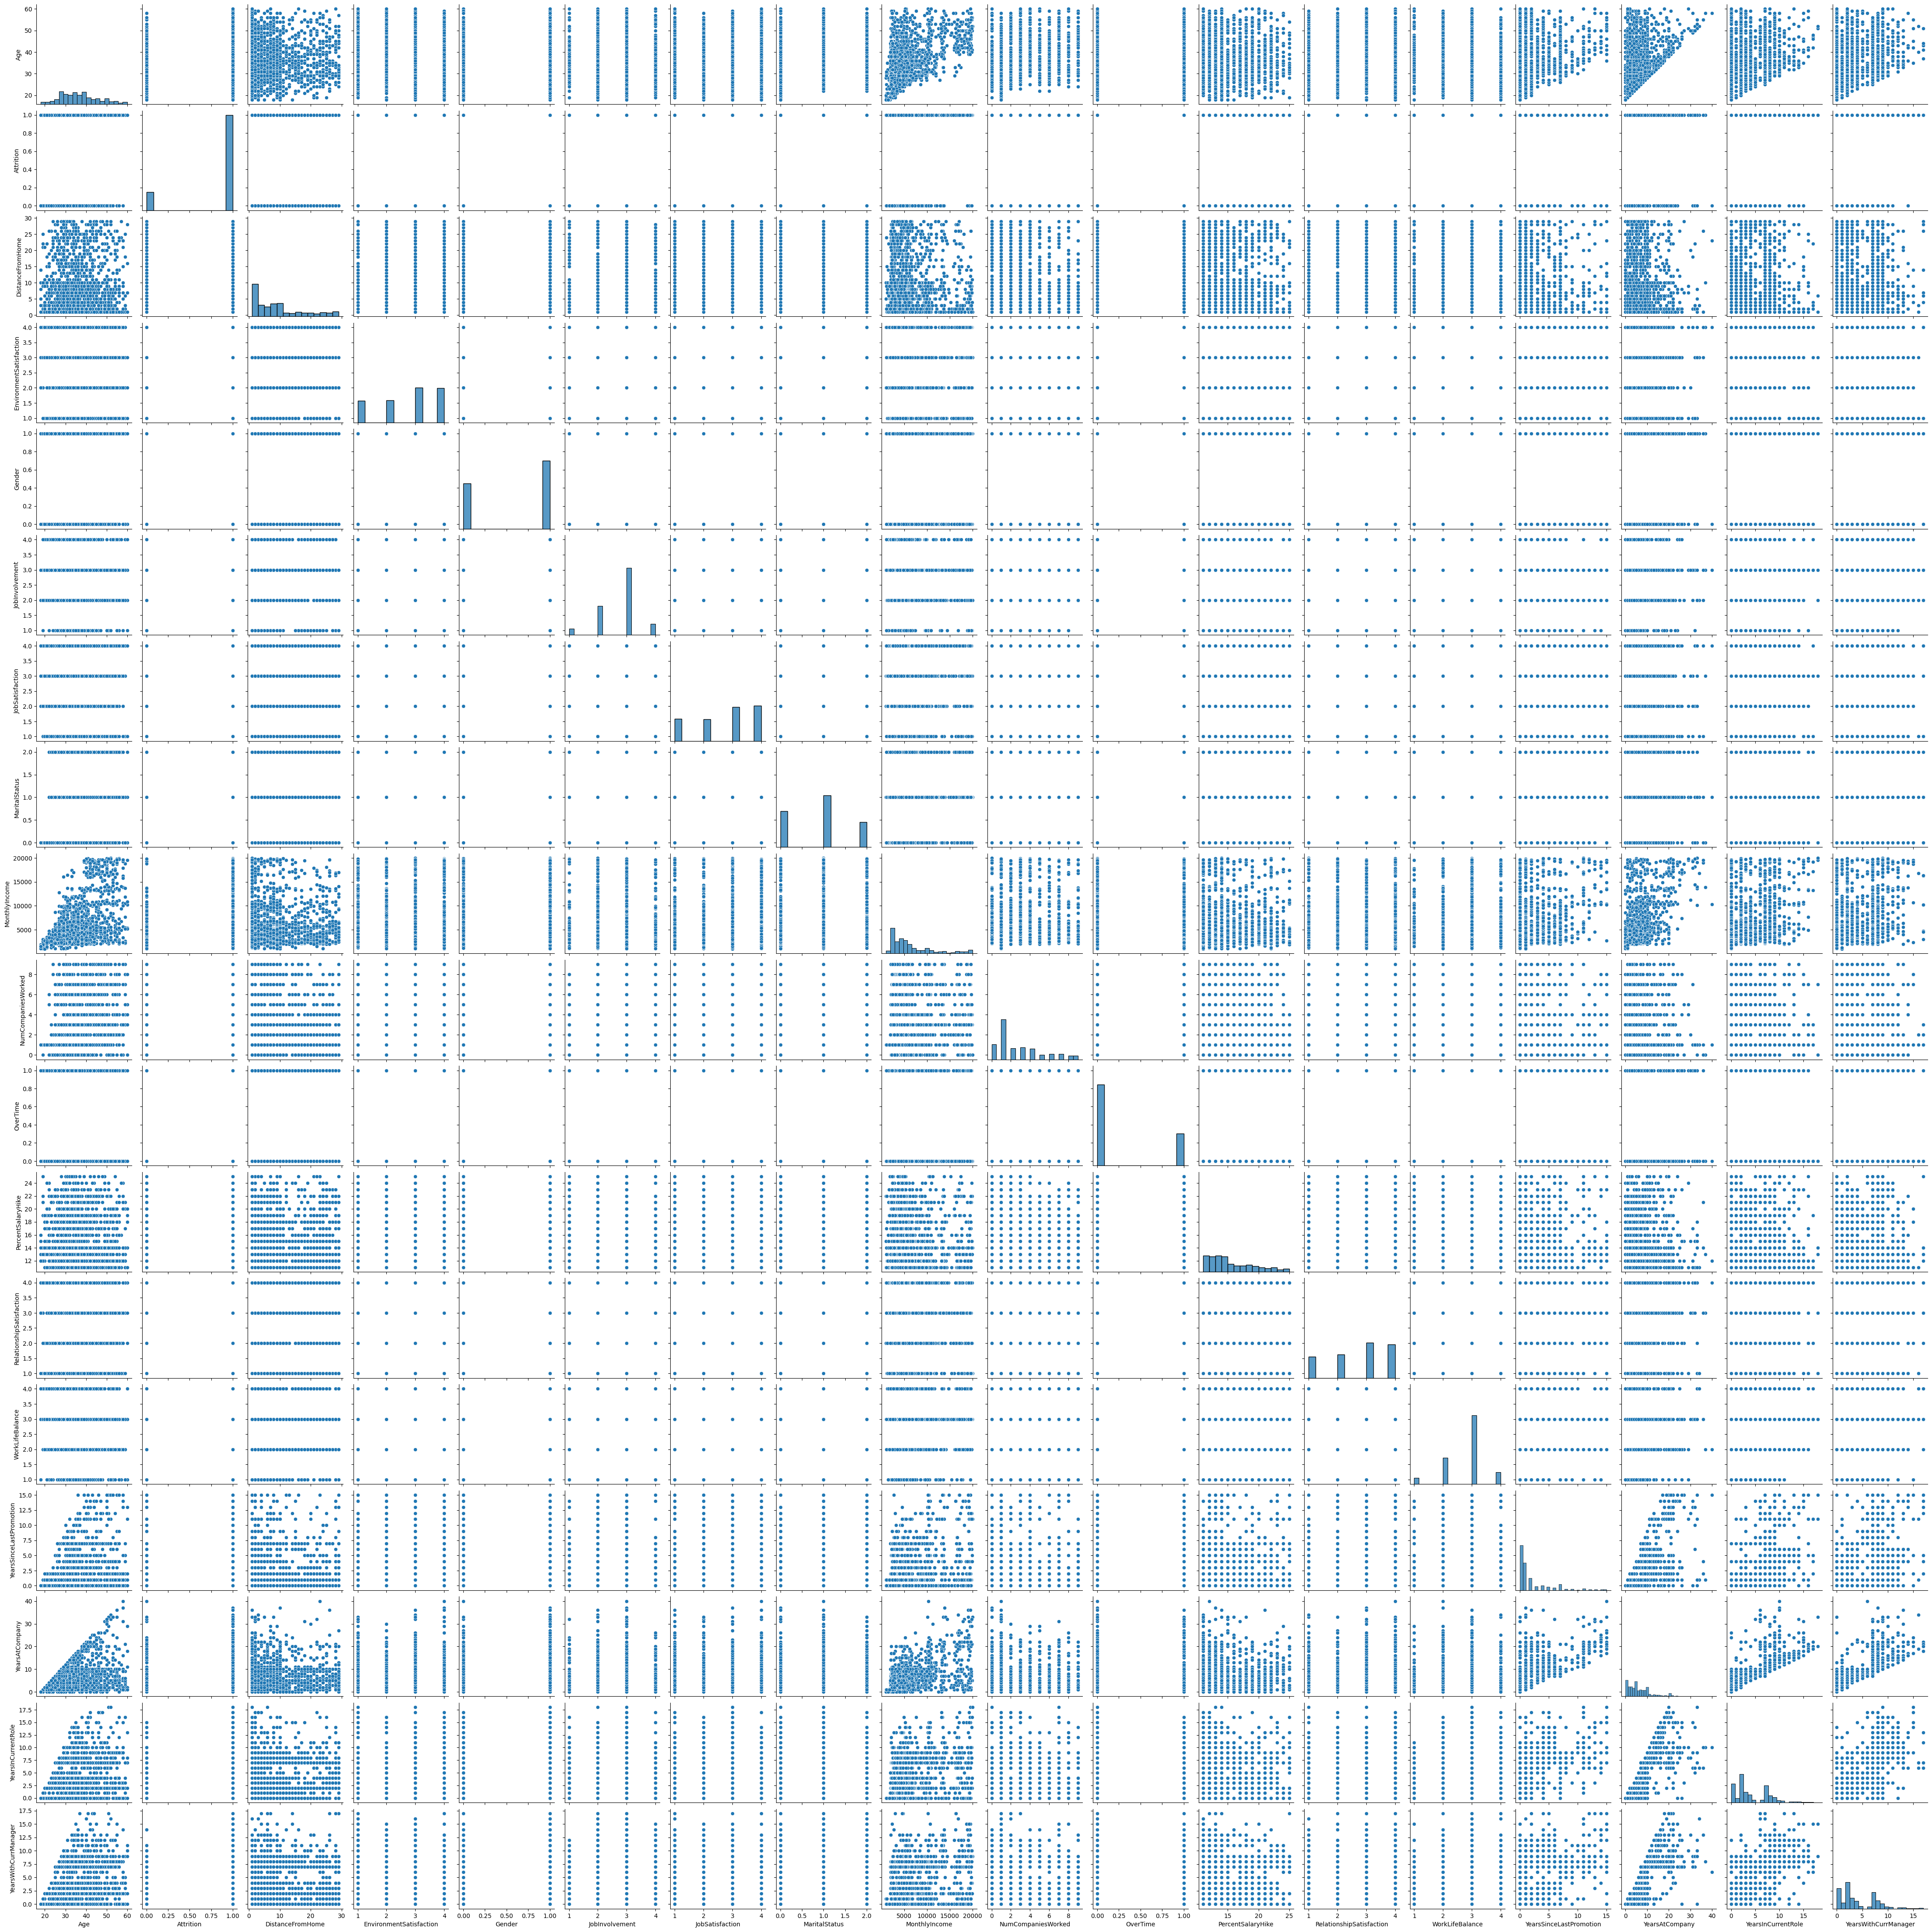

In [28]:
columns_to_plot = ['Age','Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender', 
                   'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 
                   'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
                   'RelationshipSatisfaction', 'WorkLifeBalance', 'YearsSinceLastPromotion','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']

# Filter the DataFrame by selecting only the necessary columns
df_filtered = data[columns_to_plot]

# Convert any categorical columns to numeric for plotting (e.g., Gender, MaritalStatus)
df_filtered['Attrition'] = df_filtered['Attrition'].apply(lambda x: 1 if x == 'No' else 0)
df_filtered['Gender'] = df_filtered['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_filtered['MaritalStatus'] = df_filtered['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
df_filtered['OverTime'] = df_filtered['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot the pairplot
sns.pairplot(df_filtered)

In [29]:
df_filtered.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,0,1,2,0,3,4,0,5993,8,1,11,1,1,0,6,4,5
1,49,1,8,3,1,2,2,1,5130,1,0,23,4,3,1,10,7,7
2,37,0,2,4,1,2,3,0,2090,6,1,15,2,3,0,0,0,0
3,33,1,3,4,0,3,3,1,2909,1,1,11,3,3,3,8,7,0
4,27,1,2,1,1,3,2,1,3468,9,0,12,4,3,2,2,2,2


# Detecting Outliers

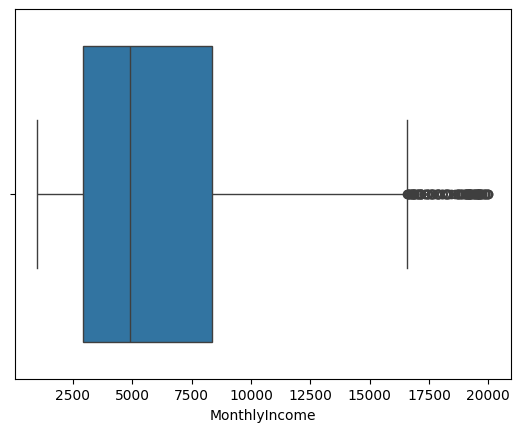

In [30]:
sns.boxplot(x=df_filtered['MonthlyIncome'])
plt.show()

In [31]:
# Define the percentiles for capping and flooring
lower_percentile = 0.01  # Floor at 1st percentile
upper_percentile = 0.99  # Cap at 99th percentile

# Calculate the percentile values for capping and flooring
lower_bound = df_filtered['MonthlyIncome'].quantile(lower_percentile)
upper_bound = df_filtered['MonthlyIncome'].quantile(upper_percentile)
print('Upper bound:', upper_bound)
print('Lower Bound:', lower_bound)
# Calculate the number of values greater than upper_bound
count_above_upper_bound = df_filtered[df_filtered['MonthlyIncome'] > upper_bound]['MonthlyIncome'].count()

# Print the result
print(f"Count of values greater than the upper bound: {count_above_upper_bound}")

outliers_above_upper = df_filtered[df_filtered['MonthlyIncome'] > upper_bound]
print("Values greater than the upper bound:")
print(outliers_above_upper)

# Calculate the number of values less than lower_bound
count_below_lower_bound = df_filtered[df_filtered['MonthlyIncome'] < lower_bound]['MonthlyIncome'].count()

# Print the result
print(f"Count of values less than the lower bound: {count_below_lower_bound}")

outliers_below_lower = df_filtered[df_filtered['MonthlyIncome'] < lower_bound]
print("Values less than the lower bound:")
print(outliers_below_lower)

# Apply the capping and flooring
df_filtered['MonthlyIncome'] = df_filtered['MonthlyIncome'].clip(lower=lower_bound)

print('minimum value:')
print(df_filtered['MonthlyIncome'].min())

Upper bound: 19626.31
Lower Bound: 1382.46
Count of values greater than the upper bound: 15
Values greater than the upper bound:
      Age  Attrition  DistanceFromHome  EnvironmentSatisfaction  Gender  \
165    50          1                11                        3       0   
190    52          1                 1                        3       1   
568    55          0                 2                        4       1   
746    41          1                 7                        2       0   
749    52          0                 2                        1       0   
770    46          1                 1                        4       1   
851    56          1                 4                        4       0   
898    43          1                 3                        3       1   
918    51          1                 9                        4       1   
956    56          1                 8                        4       1   
1009   58          1                 1        

C:\Users\shubh\AppData\Local\Temp\ipykernel_19056\1167902656.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['MonthlyIncome'] = df_filtered['MonthlyIncome'].clip(lower=lower_bound)


# Splitting the data into Test and Train

In [32]:
X= df_filtered.drop('Attrition',axis=1)
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,0,3,4,0,5993.0,8,1,11,1,1,0,6,4,5
1,49,8,3,1,2,2,1,5130.0,1,0,23,4,3,1,10,7,7
2,37,2,4,1,2,3,0,2090.0,6,1,15,2,3,0,0,0,0
3,33,3,4,0,3,3,1,2909.0,1,1,11,3,3,3,8,7,0
4,27,2,1,1,3,2,1,3468.0,9,0,12,4,3,2,2,2,2


In [33]:
y= df_filtered['Attrition']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

#dividing the data into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

In [35]:
X_train.shape, X_test.shape

((1176, 17), (294, 17))

# Normalization

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train_s = scaler.fit_transform(X_train) 
X_test_s = scaler.transform(X_test) 

In [37]:
print(X_train_s,'\n\n\n\n''TEST', X_test_s)

[[0.35714286 0.96428571 0.33333333 ... 0.375      0.77777778 0.41176471]
 [0.80952381 0.07142857 1.         ... 0.125      0.22222222 0.23529412]
 [0.45238095 0.28571429 0.         ... 0.225      0.27777778 0.41176471]
 ...
 [0.26190476 0.03571429 0.66666667 ... 0.125      0.22222222 0.23529412]
 [0.42857143 0.42857143 0.66666667 ... 0.125      0.11111111 0.23529412]
 [0.26190476 0.42857143 1.         ... 0.1        0.16666667 0.17647059]] 



TEST [[0.52380952 0.03571429 0.33333333 ... 0.         0.         0.        ]
 [0.4047619  0.53571429 1.         ... 0.075      0.11111111 0.11764706]
 [0.47619048 0.25       1.         ... 0.5        0.61111111 0.41176471]
 ...
 [0.69047619 0.03571429 0.66666667 ... 0.175      0.33333333 0.41176471]
 [0.21428571 0.03571429 1.         ... 0.15       0.11111111 0.        ]
 [0.33333333 0.14285714 0.33333333 ... 0.075      0.11111111 0.11764706]]


# Model Building

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,recall_score, f1_score
from sklearn.model_selection import GridSearchCV


In [39]:
# Logistic Regression model
logreg = LogisticRegression(solver='saga',max_iter=1000)
logreg.fit(X_train_s, y_train)

# Predictions
y_pred_train=logreg.predict(X_train_s)
y_pred_test = logreg.predict(X_test_s)

# Evaluation
# Evaluation
print("Logistic Regression Performance:")
print('Training:')
print('Classification Report: \n',classification_report(y_train, y_pred_train))
print('Testing:')
print('Classification Report: \n',classification_report(y_test, y_pred_test))

# Parameter Tunning
param_grid = {'C': [0.1, 1, 10, 100]}

grid_log_reg = GridSearchCV(logreg, param_grid, cv=5)
grid_log_reg.fit(X_train_s, y_train)

# Best parameters and performance report
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
y_pred_log_reg = grid_log_reg.predict(X_test_s)
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
Training:
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.28      0.41       180
           1       0.88      0.98      0.93       996

    accuracy                           0.87      1176
   macro avg       0.81      0.63      0.67      1176
weighted avg       0.86      0.87      0.85      1176

Testing:
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.28      0.41        57
           1       0.85      0.98      0.91       237

    accuracy                           0.84       294
   macro avg       0.81      0.63      0.66       294
weighted avg       0.83      0.84      0.81       294

Best parameters for Logistic Regression: {'C': 1}
              precision    recall  f1-score   support

           0       0.76      0.28      0.41        57
           1       0.85      0.98      0.91       237

    accuracy                  

In [40]:
# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_s, y_train)

# Predictions
y_pred_train= dt.predict(X_train_s)
y_pred_test = dt.predict(X_test_s)

# Evaluation
# Evaluation
print("Decision Tree Performance:")
print('Training:')
print('Classification Report: \n',classification_report(y_train, y_pred_train))
print('Testing:')
print('Classification Report: \n',classification_report(y_test, y_pred_test))

# Parameter Tuning
param_grid_tree = {'max_depth': [3, 5, 10, None],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}

grid_tree = GridSearchCV(dt, param_grid_tree, cv=5)
grid_tree.fit(X_train_s, y_train)

# Best parameters and performance report
print("Best parameters for Decision Tree:", grid_tree.best_params_)
y_pred_tree = grid_tree.predict(X_test_s)
print(classification_report(y_test, y_pred_tree))

Decision Tree Performance:
Training:
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       996

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

Testing:
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.30      0.37        57
           1       0.84      0.92      0.88       237

    accuracy                           0.80       294
   macro avg       0.66      0.61      0.62       294
weighted avg       0.77      0.80      0.78       294

Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.48      0.19      0.28        57
           1       0.83      0.95      0.8

In [41]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_s, y_train)

# Predictions
y_pred_train= rf.predict(X_train_s)
y_pred_test = rf.predict(X_test_s)

# Evaluation
# Evaluation
print("Random Forest Performance:")
print('Training:')
print('Classification Report: \n',classification_report(y_train, y_pred_train))
print('Testing:')
print('Classification Report: \n',classification_report(y_test, y_pred_test))

# Parameter Tuning
param_grid_forest = {'n_estimators': [100, 200, 500],
                     'max_depth': [3, 5, 10, None],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4]}

grid_forest = GridSearchCV(rf, param_grid_forest, cv=5)
grid_forest.fit(X_train_s, y_train)

# Best parameters and performance report
print("Best parameters for Random Forest:", grid_forest.best_params_)
y_pred_forest = grid_forest.predict(X_test_s)
print(classification_report(y_test, y_pred_forest))

Random Forest Performance:
Training:
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       996

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

Testing:
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.18      0.30        57
           1       0.83      1.00      0.91       237

    accuracy                           0.84       294
   macro avg       0.92      0.59      0.60       294
weighted avg       0.87      0.84      0.79       294

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      0.18      0.30        57
           1       0

In [42]:
# Gradient Boosting model
xgb = XGBClassifier()
xgb.fit(X_train_s, y_train)

# Predictions
y_pred_train= xgb.predict(X_train_s)
y_pred_test = xgb.predict(X_test_s)

# Evaluation
# Evaluation
print("Gradient Boosting Performance:")
print('Training:')
print('Classification Report: \n',classification_report(y_train, y_pred_train))
print('Testing:')
print('Classification Report: \n',classification_report(y_test, y_pred_test))

# Parameter Tuning
param_grid_xgb = {'n_estimators': [100, 200, 500],
                  'max_depth': [3, 5, 10],
                  'learning_rate': [0.01, 0.1, 0.2]}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_xgb.fit(X_train_s, y_train)

# Best parameters and performance report
print("Best parameters for XGBoost:", grid_xgb.best_params_)
y_pred_xgb = grid_xgb.predict(X_test_s)
print(classification_report(y_test, y_pred_xgb))

Gradient Boosting Performance:
Training:
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       996

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

Testing:
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.28      0.41        57
           1       0.85      0.98      0.91       237

    accuracy                           0.84       294
   macro avg       0.81      0.63      0.66       294
weighted avg       0.83      0.84      0.81       294

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.26      0.41        57
           1       0.85      0.99      0.91     

In [43]:
# Support Vector Machine model
svm = SVC()
svm.fit(X_train_s, y_train)

# Predictions
y_pred_train= svm.predict(X_train_s)
y_pred_test = svm.predict(X_test_s)

# Evaluation
# Evaluation
print("Support Vector Machine Performance:")
print('Training:')
print('Classification Report: \n',classification_report(y_train, y_pred_train))
print('Testing:')
print('Classification Report: \n',classification_report(y_test, y_pred_test))

# Parameter Tuning
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf']}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(X_train_s, y_train)

# Best parameters and performance report
print("Best parameters for SVM:", grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test_s)
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Performance:
Training:
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.26      0.41       180
           1       0.88      1.00      0.94       996

    accuracy                           0.88      1176
   macro avg       0.90      0.63      0.67      1176
weighted avg       0.89      0.88      0.85      1176

Testing:
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.16      0.27        57
           1       0.83      1.00      0.91       237

    accuracy                           0.83       294
   macro avg       0.87      0.58      0.59       294
weighted avg       0.84      0.83      0.78       294

Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      0.16      0.27        57
           1       0.83      1.00      0.91       237

    accuracy              

In [44]:
# Neural Network model
mlp = MLPClassifier()
mlp.fit(X_train_s, y_train)

# Predictions
y_pred_train= mlp.predict(X_train_s)
y_pred_test = mlp.predict(X_test_s)

# Evaluation
# Evaluation
print("Neural Network Performance:")
print('Training:')
print('Classification Report: \n',classification_report(y_train, y_pred_train))
print('Testing:')
print('Classification Report: \n',classification_report(y_test, y_pred_test))

# Parameter Tuning
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50,50)],
                  'activation': ['relu', 'tanh'],
                  'solver': ['adam', 'sgd'],
                  'alpha': [0.0001, 0.001, 0.01]}

grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5)
grid_mlp.fit(X_train_s, y_train)

# Best parameters and performance report
print("Best parameters for MLP:", grid_mlp.best_params_)
y_pred_mlp = grid_mlp.predict(X_test_s)
print(classification_report(y_test, y_pred_mlp))


c:\Data Science\technocolabs\Mini Project\Attrition-Forecast-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Performance:
Training:
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.43      0.56       180
           1       0.91      0.98      0.94       996

    accuracy                           0.90      1176
   macro avg       0.85      0.71      0.75      1176
weighted avg       0.89      0.90      0.88      1176

Testing:
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.37      0.49        57
           1       0.86      0.97      0.91       237

    accuracy                           0.85       294
   macro avg       0.81      0.67      0.70       294
weighted avg       0.84      0.85      0.83       294



c:\Data Science\technocolabs\Mini Project\Attrition-Forecast-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Data Science\technocolabs\Mini Project\Attrition-Forecast-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Data Science\technocolabs\Mini Project\Attrition-Forecast-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Data Science\technocolabs\Mini Project\Attrition-Forecast-Analysis-and-Prediction\venv\Lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.77      0.40      0.53        57
           1       0.87      0.97      0.92       237

    accuracy                           0.86       294
   macro avg       0.82      0.69      0.72       294
weighted avg       0.85      0.86      0.84       294



c:\Data Science\technocolabs\Mini Project\Attrition-Forecast-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_s, y_train)

# Predictions
y_pred_train= nb.predict(X_train_s)
y_pred_test = nb.predict(X_test_s)

# Evaluation
# Evaluation
print("Naive Bayes Performance:")
print('Training:')
print('Classification Report: \n',classification_report(y_train, y_pred_train))
print('Testing:')
print('Classification Report: \n',classification_report(y_test, y_pred_test))

# Parameter Tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Use GridSearchCV for parameter tuning
grid_nb = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning with training data
grid_nb.fit(X_train_s, y_train)

# Best parameters from tuning
print("Best parameters for Naive Bayes:", grid_nb.best_params_)

# Predictions using the best Naive Bayes model
y_pred_nb = grid_nb.predict(X_test_s)
print(classification_report(y_test, y_pred_nb))


Naive Bayes Performance:
Training:
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.52      0.54       180
           1       0.91      0.92      0.92       996

    accuracy                           0.86      1176
   macro avg       0.74      0.72      0.73      1176
weighted avg       0.86      0.86      0.86      1176

Testing:
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.42      0.51        57
           1       0.87      0.94      0.90       237

    accuracy                           0.84       294
   macro avg       0.75      0.68      0.70       294
weighted avg       0.82      0.84      0.83       294

Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       0.63      0.42      0.51        57
           1       0.87      0.94      0.90       237

    accuracy                  

In [46]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_s, y_train)

# Predictions
y_pred_train= knn.predict(X_train_s)
y_pred_test = knn.predict(X_test_s)

# Evaluation
# Evaluation
print("KNN Performance:")
print('Training:')
print('Classification Report: \n',classification_report(y_train, y_pred_train))
print('Testing:')
print('Classification Report: \n',classification_report(y_test, y_pred_test))

# Parameter Tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train_s, y_train)

# Best parameters and performance report
print("Best parameters for KNN:", grid_knn.best_params_)
y_pred_knn = grid_knn.predict(X_test_s)
print(classification_report(y_test, y_pred_knn))

KNN Performance:
Training:
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.23      0.35       180
           1       0.88      0.98      0.93       996

    accuracy                           0.87      1176
   macro avg       0.80      0.61      0.64      1176
weighted avg       0.85      0.87      0.84      1176

Testing:
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.18      0.27        57
           1       0.83      0.97      0.89       237

    accuracy                           0.82       294
   macro avg       0.71      0.57      0.58       294
weighted avg       0.78      0.82      0.77       294

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.73      0.14      0.24        57
           1       0.83      0.99      0.90       237

    ac

# Conclusion

- After comparing several machine learning models for predicting employee attrition, the Neural Network (Multi-Layer Perceptron - MLPClassifier) provided the best results with accuracy score of 86%.